#### Packages & Hyper-parameters

In [1]:
DATA_SZIE = 20
AMOUNT_OF_CENTERS = 5
import numpy as np
import random
random.seed(10)

##### Setup Test Dataset

[[5 4 8 7 2 4 1 4 8 6 6 4 6 1 4 7 8 3 7 3]
 [7 8 8 3 0 6 8 2 4 4 9 4 2 1 0 3 8 3 7 2]]


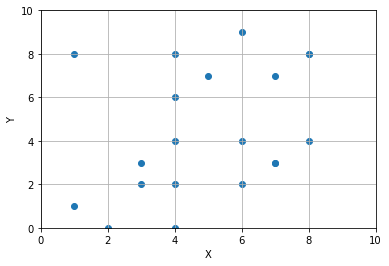

In [2]:
X = np.random.randint(10, size=DATA_SZIE)
Y = np.random.randint(10, size=DATA_SZIE)
data = [X,Y]
data = np.array(data)
print(data)

import matplotlib.pyplot as plt
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([0,10])
plt.ylim([0,10])
plt.scatter(data[0], data[1])
plt.grid(True)
plt.show()

---
##### K-means Clustering

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
df = pd.DataFrame({
    'X':data[0],
    'Y':data[1]
})

centroids:[[6.8        3.2       ]
 [2.33333333 0.33333333]
 [3.5        7.25      ]
 [7.25       8.        ]
 [3.5        2.75      ]]


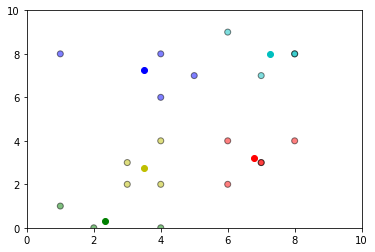

In [4]:
kmeans = KMeans(n_clusters=AMOUNT_OF_CENTERS)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
print(f'centroids:{centroids}')
fig = plt.figure()

# 宣告 colmap
colmap = {1:'r', 2:'g', 3:'b', 4:'c', 5:'y'}
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['X'], df['Y'], color=list(colors), alpha=0.5, edgecolors='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()


In [5]:
# 向量形式的高斯函數
from scipy.stats import multivariate_normal

In [6]:
import numpy as np
covariance_matrix = np.cov(data)
print(f'covariance matrix: {covariance_matrix}')
mean_vector = data.mean(1)
print(f'mean vector: {mean_vector}')

x = [1, 1]
y = multivariate_normal.pdf(x, mean=mean_vector, cov=covariance_matrix)
print(y)

a = multivariate_normal.pdf([0], mean=0, cov=[1])
print(a)

covariance matrix: [[5.04210526 2.31052632]
 [2.31052632 8.57631579]]
mean vector: [4.9  4.45]
0.004759503802836132
0.3989422804014327


In [7]:
print(len(data[1]))
print(data[:,0])
x = multivariate_normal.pdf(data[:,0],mean=mean_vector,cov=covariance_matrix)
print(x)

20
[5 7]
0.017017992980776827


In [8]:
from torch import nn
from torch.autograd import Variable
import torch
import torch.nn.functional as F
import math
# Try to build my own layer.

# declare function f(x,y)
def f(x,y):
    return math.sin(x)+2*y**2

class RBF_Layer(nn.Module):
    def __init__(self, n_input):
        # nn.Module child class函數需在構造函數中執行parent class之構造函數
        super(RBF_Layer, self).__init__()
        self.n_input = n_input
        self.weights = nn.Parameter(torch.Tensor(n_input))
        self.reset_parameters()

    def reset_parameters(self):
        self.weights.data.uniform_(0, 1)

    def forward(self, input, mean_vector, covariance_matrix):
        result = torch.Tensor(multivariate_normal(input, mean_vector[0], covariance_matrix))
        return result

# 先試著寫一個 forward function
class NETWORK(nn.Module):
    def __init__(self, n_input, n_hidden, n_output, mean_vector, covariance_matrix):
        super(NETWORK, self).__init__()
        # self.params = nn.Parameter(torch.rand(2,1))
        self.n_input = n_input
        self.RBF_Layer = RBF_Layer(n_input)
        # self.linear1 = torch.nn.Linear(n_input, n_hidden)
        # self.linear2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x, mean_vector, covariance_matrix):
        # x = torch.mm(x, self.params)
        y = RBF_Layer(x)
        # x = self.linear1(x)
        return y

network = NETWORK(1, AMOUNT_OF_CENTERS, 1, mean_vector, covariance_matrix)
loss_function = nn.MSELoss()
# optimizer = torch.optim.SGD(network.parameters(), lr = 1e-2)
optimizer = torch.optim.Adadelta(network.parameters(), lr = 0.2)

total_train_step = 0
train_data = Variable(torch.Tensor(data))

EPOCH = 2000
PRINT_FREQUENCY = 100
use_input_normalization = 1

if (use_input_normalization==1):
    std = np.linalg.norm(train_data)
    train_data = train_data/std

for epoch in range(1,EPOCH+1):
    if(epoch % PRINT_FREQUENCY == 0):
        print(f"===EPOCH:{epoch}===")
    total_train_loss = 0
    network.train()
    for i in range(len(data[1])):
        inputs = train_data[:,i]
        outputs = network(inputs, mean_vector, covariance_matrix)
        #print(f'outputs: {outputs}')

        #print(f'targets: {targets}')
        loss = outputs
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_step += 1
        total_train_loss += loss
    if(epoch % PRINT_FREQUENCY ==0):
        print(f'Loss of train dataset: {total_train_loss}')


AttributeError: 'RBF_Layer' object has no attribute 'backward'

In [5]:
import pandas as pd

x_train=pd.read_csv("dataset/PM25/test_X.txt", sep="\t",header=0)
x_train

,ID,t0-date,t0-hour,t1-date,t1-hour,t1-WIND_DIREC,t1-CH4,t1-NMHC,t1-CO,t1-RH,...,t9-THC,t9-NO,t9-WS_HR,t9-AMB_TEMP,t9-PM10,t9-O3,t9-PM2.5,t9-NOx,t9-NO2,t9-RAINFALL
0,0,2014116,0,2014115,23,90.0,1.7,0.09,0.22,59,...,1.8,0.7,0.4,18.0,47,44.0,13,4.5,3.8,0.0
1,1,2014116,1,2014116,0,120.0,1.7,0.07,0.24,64,...,1.9,1.0,0.8,17.0,51,40.0,14,7.7,6.7,0.0
2,2,2014116,2,2014116,1,88.0,1.7,0.06,0.22,65,...,1.9,0.5,1.1,15.0,55,35.0,18,10.0,9.7,0.0
3,3,2014116,3,2014116,2,80.0,1.7,0.05,0.21,64,...,2.0,0.4,1.0,14.0,56,24.0,20,17.0,17.0,0.0
4,4,2014116,4,2014116,3,26.0,1.8,0.10,0.23,67,...,1.9,0.4,1.3,14.0,41,31.0,25,9.6,9.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,20141220,19,20141220,18,121.0,1.8,0.20,0.55,73,...,1.8,1.9,3.0,15.0,19,31.0,8,8.9,7.0,0.0
1436,1436,20141220,20,20141220,19,97.0,1.8,0.15,0.48,76,...,1.8,1.5,2.9,16.0,25,33.0,10,8.0,6.5,0.0
1437,1437,20141220,21,20141220,20,107.0,1.8,0.16,0.47,80,...,1.8,1.5,2.7,17.0,18,34.0,4,7.9,6.4,0.0
1438,1438,20141220,22,20141220,21,118.0,1.8,0.16,0.51,82,...,1.8,1.3,2.8,18.0,20,36.0,1,7.0,5.7,0.0
